# Netflix Movie Data

This dataset contains more than 8,500 Netflix movies and TV shows, including cast members, duration, and genre. It contains titles added as recently as late September 2021.


## Import Package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/coegoke/Investigate-Netflix-Movie/main/netflix_dataset.csv", index_col=0)

## Data Exploration

In [12]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df.shape

(8807, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [15]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Cleaning

In [16]:
# Number of missing values
num_null = df.isnull().sum()

# percentage null values
pct_null = round((num_null/df.shape[0] * 100), 2)

# Create dataframe for number of null value and percentage of null values
df_null = pd.DataFrame({
    'Null Values':num_null,
    'Percentage':pct_null}).reset_index()

# Rename column index to Feature 
df_null.rename(columns={'index':'Features'}, inplace=True)

# Filter only features with null values and sort as descending
df_null = df_null[df_null['Null Values'] > 0].sort_values('Null Values', ascending=False).reset_index(drop=True)
df_null

,Features,Null Values,Percentage
0,director,2634,29.91
1,country,831,9.44
2,cast,825,9.37
3,date_added,10,0.11
4,rating,4,0.05
5,duration,3,0.03


48.91

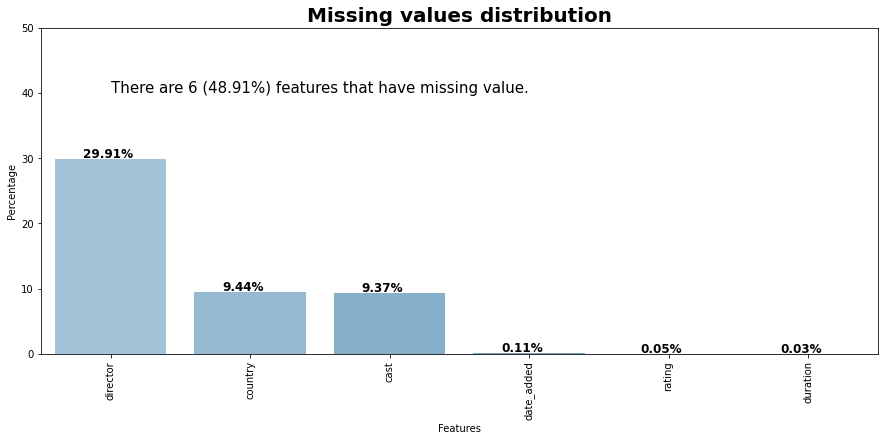

In [31]:
# Plotting number of missing data
fig, ax = plt.subplots(figsize=(15,6))

g = sns.barplot(x = 'Features',y='Percentage',data=df_null,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

# percentage of missing values
x = np.arange(len(df_null['Features']))
y = df_null['Percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 12, color='black', fontweight='bold')
    
text = 'There are '+str(len(df_null.Features)) +' ('+str(df_null.Percentage.sum())+'%) features that have missing value.'

ax.text(0,40,text,horizontalalignment='left',color='black',fontsize=15, fontweight='normal')
ax.set_title('Missing values distribution', color='black', fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim(0,50)
plt.show()

In [33]:
df.select_dtypes('number').columns

Index(['release_year'], dtype='object')

In [1]:
df.query("type == 'Movie'")

NameError: ignored

In [ ]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
print(df.country.value_counts())
print('Jumlah unik di kolom negara ""= '+str(len(df.country.unique())))

United States                           2818
India                                    972
United Kingdom                           419
Japan                                    245
South Korea                              199
                                        ... 
United Kingdom, Pakistan                   1
Norway, Denmark, Netherlands, Sweden       1
Philippines, Singapore, Indonesia          1
United Kingdom, Spain, United States       1
France, Lebanon                            1
Name: country, Length: 748, dtype: int64
Jumlah unik di kolom negara = 749


In [ ]:
df.director.value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64